# Data Preparation

In [1]:
import pandas as pd

In [2]:
dataset_df = pd.read_csv('drive/MyDrive/01_punct_pushkin.csv')
del dataset_df['Unnamed: 0']
dataset_df

,input,input_lemma,input_pos,target
0,с тех пор жил он в своей симбирской деревне гд...,с тот пора жить он в свой симбирский деревня г...,ADP DET NOUN VERB PRON ADP DET ADJ NOUN ADV CC...,S S S S S S S S C S S S S S S S C S S S P
1,матушка была еще мною брюхата как уже я был за...,матушка быть еще я брюхатый как уже я быть зап...,NOUN AUX ADV PRON NOUN SCONJ ADV PRON AUX VERB...,S S S S C S S S S S S S S C S S S S S C S S P
2,если бы паче всякого чаяния матушка родила доч...,если бы паче всякий чаяние матушка родить дочь...,SCONJ AUX ADV DET NOUN NOUN VERB NOUN SCONJ NO...,S S S S S S S C S S S S S S S S S C S S S S S P
3,с пятилетнего возраста отдан я был на руки стр...,с пятилетний возраст отдать я быть на рука стр...,ADP ADJ NOUN VERB PRON AUX ADP NOUN ADJ NOUN A...,S S S S S S S S S C S S S S S S P
4,в это время батюшка нанял для меня француза мо...,в это время батюшка нанять для я француз мосье...,ADP DET NOUN NOUN VERB ADP PRON NOUN ADJ NOUN ...,S S S S S S S C S C S S S S S S S S S S S P
...,...,...,...,...
4451,лиза вздрогнула подняла голову закричала и хот...,лиза вздрогнуть поднять голова закричать и хот...,NOUN NOUN VERB NOUN VERB CCONJ VERB VERB,S C S C S S S P
4452,акулина друг мой акулина повторял он целуя ее ...,акулин друг мой акулина повторять он целовать ...,VERB NOUN DET NOUN VERB PRON VERB PRON NOUN,C S C C S C S S P
4453,мисс жаксон свидетельница этой сцены не знала ...,мисс жаксон свидетельница этот сцена не знать ...,NOUN VERB NOUN DET NOUN PART VERB PRON VERB,S C S S C S C S P
4454,в эту минуту дверь отворилась и григорий ивано...,в этот минута дверь отвориться и григорий иван...,ADP DET NOUN NOUN NOUN CCONJ NOUN NOUN VERB,S S S S C S S S P


In [3]:
char_mapping = {'S': ' ', 'C': ', ', 'P': '.', 'EX': '!', 'Q': '?'}

restored_input = []
for i, row in dataset_df.iterrows():
    input, target = row['input'], row['target']
    input_raw = ''
    for inp, tgt in zip(input.split(' '), target.split(' ')):
        input_raw += inp + char_mapping[tgt]
    restored_input.append(input_raw + '\n')

with open('01_punct_pushkin.txt', 'w') as f:
    f.writelines(restored_input)

print(*restored_input[:5], sep='')

с тех пор жил он в своей симбирской деревне, где и женился на девице авдотье васильевне ю, дочери бедного тамошнего дворянина.
матушка была еще мною брюхата, как уже я был записан в семеновский полк сержантом, по милости майора гвардии князя в, близкого нашего родственника.
если бы паче всякого чаяния матушка родила дочь, то батюшка объявил бы куда следовало о смерти неявившегося сержанта, и дело тем бы и кончилось.
с пятилетнего возраста отдан я был на руки стремянному савельичу, за трезвое поведение пожалованному мне в дядьки.
в это время батюшка нанял для меня француза, мосье бопре, которого выписали из москвы вместе с годовым запасом вина и прованского масла.



Breaking sentences into words.

For each word, it is indicated what needs to be placed after it: space, comma, period, etc.

In [4]:
import os
import re
import string
from typing import Optional, Pattern

from sklearn.model_selection import train_test_split


TOKEN_RE = re.compile(r'-?\d*\.\d+|[a-zа-яё]+|-?\d+|\S', re.I)  # ignore case


def tokenize_text_regex(txt: str, regex: Pattern[str], min_token_size: int = 0) -> list[str]:
    """Tokenize text with regex
    Args:
        txt: text to tokenize
        regex: re.compile output
        min_token_size: min char length to highlight as token
    Returns:
        tokens list
    """
    all_tokens = regex.findall(txt.lower())
    return [token for token in all_tokens if len(token) >= min_token_size]


def tokenize(corpus: list[str]) -> list[list[str]]:
    """Tokenize text corpus with simple regex
    Args:
        corpus: text corpus
    Returns:
        List of tokenized texts
    """
    tokenized_corpus = []
    for doc in corpus:
        tokenized_corpus.append(tokenize_text_regex(doc, TOKEN_RE))

    return tokenized_corpus


def make_labeling(tokenized_corpus: list[list[str]], save_path: Optional[str] = None) -> list[list[str]]:
    """
    Make labeling to correspond BertPunc input data
    https://github.com/IsaacChanghau/neural_sequence_labeling/tree/master/data/raw/LREC
    Args:
        tokenized_corpus: tokenized text corpus
        save_path: path to save labeling result
    Returns:
        labeled tokenized text corpus
    """
    labeled_tokens = []
    for text_tokenized in tokenized_corpus:
        text_tokenized.append("")
        for i in range(len(text_tokenized) - 1):
            if text_tokenized[i] in string.punctuation:
                if text_tokenized[i + 1] == ".":
                    labeled_tokens[-1][1] = "PERIOD"
                elif text_tokenized[i + 1] == ",":
                    labeled_tokens[-1][1] = "COMMA"
                elif text_tokenized[i + 1] == "?":
                    labeled_tokens[-1][1] = "QUESTION"
                else:
                    continue
            else:
                if text_tokenized[i + 1] == ".":
                    labeled_tokens.append([text_tokenized[i], "PERIOD"])
                elif text_tokenized[i + 1] == ",":
                    labeled_tokens.append([text_tokenized[i], "COMMA"])
                elif text_tokenized[i + 1] == "?":
                    labeled_tokens.append([text_tokenized[i], "QUESTION"])
                else:
                    labeled_tokens.append([text_tokenized[i], "OVERALL"])

    if save_path is not None:
        with open(save_path, "w") as f:
            for token, label in labeled_tokens:
                f.write(f"{token}\t{label}\n")

    return labeled_tokens


def make_datasets(
        path_to_preprocessed_corpus: str, config: dict
) -> tuple[list[list[str]], list[list[str]], list[list[str]]]:
    """
    Create labelled train, valid, test datasets for BertPunc
    Args:
        path_to_preprocessed_corpus: path to preprocessed text corpus
        config: config
    Returns:
        (train corpus, valid corpus, test corpus)
    """
    with open(path_to_preprocessed_corpus) as f:
        corpus = f.readlines()

    train_corpus, valid_corpus = train_test_split(
        corpus,
        random_state=config['random_seed'],
        test_size=config['valid_rate'] + config['test_rate'],
    )
    valid_corpus, test_corpus = train_test_split(
        valid_corpus,
        random_state=config['random_seed'],
        test_size=config['test_rate'],
    )

    train_corpus = tokenize(train_corpus)
    valid_corpus = tokenize(valid_corpus)
    test_corpus = tokenize(test_corpus)

    train_corpus = make_labeling(train_corpus, config['train_path_name'])
    valid_corpus = make_labeling(valid_corpus, config['valid_path_name'])
    test_corpus = make_labeling(test_corpus, config['test_path_name'])

    print(f"Train amount: {len(train_corpus)}\nValid amount: {len(valid_corpus)}\nTest amount: {len(test_corpus)}")

    return train_corpus, valid_corpus, test_corpus

In [5]:
os.makedirs('dataset', exist_ok=True)

dataset_config = {
    "random_seed": 78,
    "valid_rate": 0.15,
    "test_rate": 0.05,
    "train_path_name": "dataset/01_punct_pushkin_train.txt",
    "valid_path_name": "dataset/01_punct_pushkin_valid.txt",
    "test_path_name": "dataset/01_punct_pushkin_test.txt",
}

train_corpus, valid_corpus, test_corpus = make_datasets("./01_punct_pushkin.txt", dataset_config)

Train amount: 47474
Valid amount: 11110
Test amount: 537


In [6]:
!ls dataset

01_punct_pushkin_test.txt  01_punct_pushkin_train.txt  01_punct_pushkin_valid.txt


In [24]:
!head -n 8 dataset/01_punct_pushkin_train.txt

это	OVERALL
что	OVERALL
еще	COMMA
вскричал	OVERALL
пугачев	COMMA
сверкнув	OVERALL
огненными	OVERALL
глазами	PERIOD


# DeepPavlov BERTpunc

[`BertPunc`](https://github.com/nkrnrnk/BertPunc) adds an extra linear layer on top of the pretrained `BERT` masked language model (`BertForMaskedLM`). `BertForMaskedLM` outputs a logit vector for every (masked) token. The logit vector has a 30522 size corresponding to the `BERT` token vocabulary (english language). The extra linear layer maps to the possible punctutation characters (4 in case of the IWSLT dataset: `comma`, `period`, `question mark` and `no punctuation`).

`BertPunc` is trained by feeding it with word sequences of a fixed segment size. The label for a segment is the punctuation for the middle word in the sentence. The segment size is a hyperparameter, for the `ISWLT` dataset a size of 32 tokens works well.

This model uses embeddings from transformer-based encoder layers instead of use LM logits (to decrease dimension in front of FC, `stacked_hidden_states`).
[`DeepPavlov/rubert-base-cased-sentence`](https://huggingface.co/DeepPavlov/rubert-base-cased-sentence) is used as a backbone transformer-based encoder. Supported punctuation marks: `period`, `comma` and `question`.

In [7]:
import os
import json
import random
import warnings
from datetime import datetime

import torch
import numpy as np
from tqdm import tqdm
from torch import nn, optim
from sklearn import metrics
from sklearn.exceptions import UndefinedMetricWarning
from torch.utils.data import TensorDataset, DataLoader
from transformers import AutoTokenizer, PreTrainedTokenizer
from transformers import BertModel, BertForMaskedLM, BertConfig

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Functions for reading and converting data

In [8]:
def init_random_seed_torch(value: int = 0) -> None:
    """Initializes random seed for reproducibility random processes
    Args:
        value:
    Returns:
        None
    """
    random.seed(value)
    np.random.seed(value)
    os.environ['PYTHONHASHSEED'] = str(value)
    torch.manual_seed(value)
    torch.cuda.manual_seed(value)
    torch.cuda.manual_seed_all(value)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.set_printoptions(precision=10)


def load_file(filename: str) -> list[str]:
    with open(filename, 'r', encoding='utf-8') as f:
        data = f.readlines()
    return data


def encode_data(
    data: list[str], tokenizer: PreTrainedTokenizer, punctuation_enc: dict
) -> tuple[list, list]:
    """
    Converts words to (BERT) tokens and punctuation to given encoding.
    Note that words can be composed of multiple tokens.
    """
    X, Y = [], []
    for line in data:
        word, punc = line.split('\t')
        punc = punc.strip()
        tokens = tokenizer.tokenize(word)
        x = tokenizer.convert_tokens_to_ids(tokens)
        y = [punctuation_enc[punc]]
        if len(x) > 0:
            if len(x) > 1:
                y = (len(x)-1)*[0]+y
            X += x
            Y += y
    return X, Y


def insert_target(x, segment_size) -> np.ndarray:
    """
    Creates segments of surrounding words for each word in x.
    Inserts a zero token halfway the segment.
    """
    X = []
    x_pad = x[-((segment_size-1)//2-1):] + x + x[:segment_size//2]

    for i in range(len(x_pad)-segment_size+2):
        segment = x_pad[i:i+segment_size-1]
        segment.insert((segment_size-1)//2, 0)
        X.append(segment)

    return np.array(X)


def preprocess_data(
        data: list, tokenizer: PreTrainedTokenizer,
        punctuation_enc: dict, segment_size: int
) -> tuple[np.ndarray, np.ndarray]:
    X, y = encode_data(data, tokenizer, punctuation_enc)
    X = insert_target(X, segment_size)
    return X, np.array(y)


def create_data_loader(
    X: np.ndarray, y: np.ndarray, batch_size: int, shuffle: bool
) -> DataLoader:
    data_set = TensorDataset(torch.from_numpy(X).long(), torch.from_numpy(y).long())
    data_loader = DataLoader(data_set, batch_size=batch_size, shuffle=shuffle)
    return data_loader

Model

In [9]:
class BertPunc(nn.Module):
    def __init__(self, segment_size: int, output_size: int, config: dict):
        super(BertPunc, self).__init__()
        model_config = BertConfig.from_pretrained(config['name_or_path'])

        if config['mode']['name'] == 'lm_logits':
            self.bert = BertForMaskedLM.from_pretrained(config['name_or_path'], config=model_config)
        else:
            model_config.output_hidden_states = True
            self.bert = BertModel.from_pretrained(config['name_or_path'], config=model_config)
        self.bert_vocab_size = config['tokenizer_vocab_size']
        self.config = config

        if config['mode']['name'] == 'lm_logits':
            self.bn = nn.BatchNorm1d(segment_size * self.bert_vocab_size)
            self.fc = nn.Linear(segment_size * self.bert_vocab_size, output_size)
        elif config['mode']['name'] == 'stacked_hidden_states':
            if config['mode']['config']['type'] == 'concat':
                self.fc = nn.Linear(model_config.hidden_size * config['mode']['config']['n_layers'], output_size)

        self.dropout = nn.Dropout(config['dropout'])

    def forward(self, x):
        x = self.bert(x)

        if self.config['mode']['name'] == 'lm_logits':
            x = x.logits
            x = x.view(x.shape[0], -1)
            x = self.fc(self.dropout(self.bn(x)))

        elif self.config['mode']['name'] == 'stacked_hidden_states':
            x = x.hidden_states
            _reverse = -1 if self.config['mode']['config']['reverse'] else 1
            x = torch.cat(tuple(x[_reverse * i] for i in range(1, self.config['mode']['config']['n_layers'] + 1)), dim=-1)

            if self.config['mode']['config']['sent_agg_type'] == 'mean':
                x = x.mean(dim=1)

            x = self.dropout(x)
            x = self.fc(x)

        return x

Model training code

In [10]:
class Trainer:
    def __init__(
            self, device: torch.device, model: nn.Module,
            optimizer: optim.Optimizer, criterion: nn.modules.loss,
            epochs: int, iterations: int,
            data_loader_train: DataLoader, data_loader_valid: DataLoader,
            punctuation_enc: dict, save_path: str,
    ):
        self.device = device
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.epochs = epochs
        self.iterations = iterations
        self.data_loader_train = data_loader_train
        self.data_loader_valid = data_loader_valid
        self.punctuation_enc = punctuation_enc
        self.save_path = save_path
        self.best_model_path = None

    def _validate(
        self, epoch: int, iteration: int, train_loss: float, best_val_loss: float
    ) -> float:
        val_losses, val_accs, val_f1s = [], [], []
        label_keys = list(self.punctuation_enc.keys())
        label_vals = list(self.punctuation_enc.values())

        for inputs, labels in tqdm(self.data_loader_valid, total=len(self.data_loader_valid)):
            with torch.no_grad():
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                output = self.model(inputs)
                val_loss = self.criterion(output, labels)
                val_losses.append(val_loss.cpu().data.numpy())
                y_pred = output.argmax(dim=1).cpu().data.numpy().flatten()
                y_true = labels.cpu().data.numpy().flatten()
                val_accs.append(metrics.accuracy_score(y_true, y_pred))
                val_f1s.append(metrics.f1_score(y_true, y_pred, average=None, labels=label_vals))

        val_loss = np.mean(val_losses)
        val_acc = np.mean(val_accs)
        val_f1 = np.array(val_f1s).mean(axis=0)

        improved = ''
        if val_loss < best_val_loss:
            improved = '*'
            best_val_loss = val_loss
            # model_path = self.save_path + f'model_{epoch:02d}_{iteration:02d}.pt'
            model_path = self.save_path + 'model.pt'
            torch.save(self.model.state_dict(), model_path)
            self.best_model_path = model_path

        f1_cols = ';'.join(['f1_' + key for key in label_keys])
        progress_path = self.save_path + 'train_log.csv'
        if not os.path.isfile(progress_path):
            with open(progress_path, 'w') as f:
                f.write('time;epoch;iteration;train loss;val loss;accuracy;' + f1_cols + '\n')

        f1_vals = ';'.join([f'{val:.4f}' for val in val_f1])
        with open(progress_path, 'a') as f:
            f.write(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')};{epoch + 1};{iteration};" +
                    f"{train_loss:.4f};{val_loss:.4f};{val_acc:.4f};{f1_vals}\n")

        print(f"Epoch: {epoch + 1}/{self.epochs}",
              f"Iteration: {iteration}/{self.iterations}",
              f"Train Loss: {train_loss:.4f}", f"Val Loss: {val_loss:.4f}",
              f"Accuracy: {val_acc:.4f}", f"F1(o;,;.;?): {f1_vals}", improved)

        return best_val_loss

    def _train(self, best_val_loss: float) -> float:
        print_every = len(self.data_loader_train) // self.iterations + 1
        self.model.train()
        pbar = tqdm(total=print_every)

        train_loss = np.inf
        for e in range(self.epochs):
            counter = 1
            iteration = 1

            for inputs, labels in self.data_loader_train:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                output = self.model(inputs)
                loss = self.criterion(output, labels)
                loss.backward()
                self.optimizer.step()
                self.optimizer.zero_grad()
                train_loss = loss.cpu().data.numpy()

                pbar.update()

                if counter % print_every == 0:
                    pbar.close()
                    self.model.eval()
                    best_val_loss = self._validate(
                        e, iteration, train_loss, best_val_loss
                    )
                    self.model.train()
                    pbar = tqdm(total=print_every)
                    iteration += 1

                counter += 1

            pbar.close()
            self.model.eval()
            best_val_loss = self._validate(
                e, iteration, train_loss, best_val_loss
            )
            self.model.train()
            if e < self.epochs - 1:
                pbar = tqdm(total=print_every)

        return best_val_loss

    def fit(self, best_val_loss: float = np.inf) -> float:
        best_val_loss = self._train(best_val_loss)
        # Load best model -> inference mode
        self.model.load_state_dict(torch.load(self.best_model_path))
        self.model.eval()
        return best_val_loss

Training config

In [11]:
punctuation_enc = {'OVERALL': 0, 'COMMA': 1, 'PERIOD': 2, 'QUESTION': 3}

segment_size = 16
epochs_top = 1
iterations_top = 2
batch_size_top = 512
learning_rate_top = 1e-5
epochs_all = 5
iterations_all = 3
batch_size_all = 256
learning_rate_all = 1e-5
dropout = 0.3

train_config = {
    "segment_size": segment_size,
    "epochs_top": epochs_top,
    "iterations_top": iterations_top,
    "batch_size_top": batch_size_top,
    "learning_rate_top": learning_rate_top,
    "epochs_all": epochs_all,
    "iterations_all": iterations_all,
    "batch_size_all": batch_size_all,
    "learning_rate_all": learning_rate_all,
    "model": {
        "name_or_path": "DeepPavlov/rubert-base-cased-sentence",  # backbone transformer-based encoder
        "tokenizer_vocab_size": None,
        "dropout": dropout,
        "mode": {
            "name": "stacked_hidden_states",
            "config": {
                "type": "concat",
                "n_layers": 4,
                "reverse": True,
                "sent_agg_type": "mean"
            }
        }
    }
}

data_train = load_file("dataset/01_punct_pushkin_train.txt")
data_valid = load_file("dataset/01_punct_pushkin_valid.txt")
print(f"Train data: {len(data_train)}, Valid data: {len(data_valid)}")

tokenizer = AutoTokenizer.from_pretrained(train_config["model"]["name_or_path"], do_lower_case=True)
train_config["model"]["tokenizer_vocab_size"] = tokenizer.vocab_size  # set tokenizer_vocab_size
save_path = f"checkpoints/{datetime.now().strftime('%Y%m%d_%H%M%S')}/"
os.makedirs(save_path, exist_ok=True)

with open(save_path + "train_config.json", "w") as f:
    json.dump(train_config, f)
print("Train config saved:", save_path + "train_config.json")

Train data: 47474, Valid data: 11110


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Train config saved: checkpoints/20240608_172037/train_config.json


In [12]:
init_random_seed_torch(78)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

print("Data preprocessing...")
X_train, y_train = preprocess_data(data_train, tokenizer, punctuation_enc, segment_size)
X_valid, y_valid = preprocess_data(data_valid, tokenizer, punctuation_enc, segment_size)

print("Model initialization...")
output_size = len(punctuation_enc)
bert_punc = BertPunc(segment_size, output_size, train_config["model"]).to(device)

Data preprocessing...
Model initialization...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [15]:
!nvidia-smi

Sat Jun  8 17:22:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0              28W /  70W |    837MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Training

In [16]:
%%time

print("Top layer training...")
data_loader_train = create_data_loader(X_train, y_train, batch_size=batch_size_top, shuffle=True)
data_loader_valid = create_data_loader(X_valid, y_valid, batch_size=batch_size_top, shuffle=False)

for p in bert_punc.bert.parameters():
    p.requires_grad = False

optimizer = optim.Adam(bert_punc.parameters(), lr=learning_rate_top)
criterion = nn.CrossEntropyLoss()

trainer_top = Trainer(
    device, bert_punc, optimizer, criterion, epochs_top, iterations_top,
    data_loader_train, data_loader_valid, punctuation_enc, save_path
)
best_val_loss = trainer_top.fit()

print("All layers training...")
# load the model to continue training
bert_punc.load_state_dict(torch.load(trainer_top.best_model_path))
data_loader_train = create_data_loader(X_train, y_train, batch_size=batch_size_all, shuffle=True)
data_loader_valid = create_data_loader(X_valid, y_valid, batch_size=batch_size_all, shuffle=False)

for p in bert_punc.bert.parameters():
    p.requires_grad = True

optimizer = optim.Adam(bert_punc.parameters(), lr=learning_rate_all)
criterion = nn.CrossEntropyLoss()

trainer_all = Trainer(
    device, bert_punc, optimizer, criterion, epochs_all, iterations_all,
    data_loader_train, data_loader_valid, punctuation_enc, save_path
)

best_val_loss = trainer_all.fit(best_val_loss=best_val_loss)
print(f"\nbest_model_path: {trainer_all.best_model_path}, best_val_loss: {best_val_loss:.4f}")

Top layer training...


100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Epoch: 1/1 Iteration: 1/2 Train Loss: 0.8403 Val Loss: 0.8508 Accuracy: 0.8264 F1(o;,;.;?): 0.9051;0.0000;0.0000;0.0000 *


100%|██████████| 30/30 [00:13<00:00,  2.25it/s]


Epoch: 1/1 Iteration: 2/2 Train Loss: 0.6804 Val Loss: 0.6882 Accuracy: 0.8293 F1(o;,;.;?): 0.9066;0.0000;0.0000;0.0000 *
All layers training...


100%|██████████| 60/60 [00:12<00:00,  4.84it/s]


Epoch: 1/5 Iteration: 1/3 Train Loss: 0.4383 Val Loss: 0.3819 Accuracy: 0.8474 F1(o;,;.;?): 0.9319;0.5411;0.1813;0.0000 *


100%|██████████| 60/60 [00:12<00:00,  4.75it/s]


Epoch: 1/5 Iteration: 2/3 Train Loss: 0.3693 Val Loss: 0.2828 Accuracy: 0.8944 F1(o;,;.;?): 0.9531;0.5915;0.5425;0.0000 *


100%|██████████| 60/60 [00:12<00:00,  4.79it/s]


Epoch: 1/5 Iteration: 3/3 Train Loss: 0.4864 Val Loss: 0.2654 Accuracy: 0.8975 F1(o;,;.;?): 0.9568;0.6336;0.5963;0.0000 *


100%|██████████| 60/60 [00:12<00:00,  4.80it/s]


Epoch: 2/5 Iteration: 1/3 Train Loss: 0.2882 Val Loss: 0.2444 Accuracy: 0.9064 F1(o;,;.;?): 0.9603;0.6648;0.6314;0.0000 *


100%|██████████| 60/60 [00:12<00:00,  4.85it/s]


Epoch: 2/5 Iteration: 2/3 Train Loss: 0.2658 Val Loss: 0.2327 Accuracy: 0.9120 F1(o;,;.;?): 0.9631;0.6785;0.6613;0.0000 *


100%|██████████| 60/60 [00:12<00:00,  4.83it/s]


Epoch: 2/5 Iteration: 3/3 Train Loss: 0.1865 Val Loss: 0.2152 Accuracy: 0.9176 F1(o;,;.;?): 0.9664;0.6862;0.6626;0.0000 *


100%|██████████| 60/60 [00:12<00:00,  4.86it/s]


Epoch: 3/5 Iteration: 1/3 Train Loss: 0.2758 Val Loss: 0.2174 Accuracy: 0.9197 F1(o;,;.;?): 0.9667;0.7092;0.6706;0.0000 


100%|██████████| 60/60 [00:12<00:00,  4.85it/s]


Epoch: 3/5 Iteration: 2/3 Train Loss: 0.1137 Val Loss: 0.2072 Accuracy: 0.9233 F1(o;,;.;?): 0.9685;0.7138;0.6746;0.0000 *


100%|██████████| 60/60 [00:12<00:00,  4.71it/s]


Epoch: 3/5 Iteration: 3/3 Train Loss: 0.1825 Val Loss: 0.2078 Accuracy: 0.9235 F1(o;,;.;?): 0.9679;0.7355;0.6891;0.0000 


100%|██████████| 60/60 [00:12<00:00,  4.84it/s]


Epoch: 4/5 Iteration: 1/3 Train Loss: 0.0938 Val Loss: 0.2074 Accuracy: 0.9257 F1(o;,;.;?): 0.9698;0.7315;0.6870;0.0000 


100%|██████████| 60/60 [00:12<00:00,  4.87it/s]


Epoch: 4/5 Iteration: 2/3 Train Loss: 0.1206 Val Loss: 0.2047 Accuracy: 0.9279 F1(o;,;.;?): 0.9703;0.7393;0.6846;0.0000 *


100%|██████████| 60/60 [00:12<00:00,  4.87it/s]


Epoch: 4/5 Iteration: 3/3 Train Loss: 0.1480 Val Loss: 0.2029 Accuracy: 0.9279 F1(o;,;.;?): 0.9712;0.7345;0.6895;0.0000 *


100%|██████████| 60/60 [00:12<00:00,  4.85it/s]


Epoch: 5/5 Iteration: 1/3 Train Loss: 0.1225 Val Loss: 0.2238 Accuracy: 0.9276 F1(o;,;.;?): 0.9707;0.7464;0.7031;0.0000 


100%|██████████| 60/60 [00:12<00:00,  4.84it/s]


Epoch: 5/5 Iteration: 2/3 Train Loss: 0.1536 Val Loss: 0.2119 Accuracy: 0.9295 F1(o;,;.;?): 0.9717;0.7426;0.6951;0.0000 


100%|██████████| 60/60 [00:12<00:00,  4.84it/s]


Epoch: 5/5 Iteration: 3/3 Train Loss: 0.1531 Val Loss: 0.2156 Accuracy: 0.9301 F1(o;,;.;?): 0.9722;0.7424;0.6940;0.0000 

best_model_path: checkpoints/20240608_172037/model.pt, best_val_loss: 0.2029
CPU times: user 17min 35s, sys: 15.2 s, total: 17min 50s
Wall time: 19min 29s


In [17]:
!nvidia-smi

Sat Jun  8 17:43:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              31W /  70W |   5567MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [35]:
def highlight_best_model(s):
    if s['val loss'] == 0.2029:
        return ['background-color: yellow'] * len(s)
    else:
        return [''] * len(s)

In [36]:
train_log_df = pd.read_csv('checkpoints/20240608_172037/train_log.csv', sep=';')
train_log_df.style.apply(highlight_best_model, axis=1)

,time,epoch,iteration,train loss,val loss,accuracy,f1_OVERALL,f1_COMMA,f1_PERIOD,f1_QUESTION
0,2024-06-08 17:23:25,1,1,0.840300,0.850800,0.826400,0.905100,0.000000,0.000000,0.000000
1,2024-06-08 17:24:12,1,2,0.680400,0.688200,0.829300,0.906600,0.000000,0.000000,0.000000
2,2024-06-08 17:25:25,1,1,0.438300,0.381900,0.847400,0.931900,0.541100,0.181300,0.000000
3,2024-06-08 17:26:40,1,2,0.369300,0.282800,0.894400,0.953100,0.591500,0.542500,0.000000
4,2024-06-08 17:27:55,1,3,0.486400,0.265400,0.897500,0.956800,0.633600,0.596300,0.000000
5,2024-06-08 17:29:11,2,1,0.288200,0.244400,0.906400,0.960300,0.664800,0.631400,0.000000
6,2024-06-08 17:30:24,2,2,0.265800,0.232700,0.912000,0.963100,0.678500,0.661300,0.000000
7,2024-06-08 17:31:36,2,3,0.186500,0.215200,0.917600,0.966400,0.686200,0.662600,0.000000
8,2024-06-08 17:32:46,3,1,0.275800,0.217400,0.919700,0.966700,0.709200,0.670600,0.000000
9,2024-06-08 17:34:00,3,2,0.113700,0.207200,0.923300,0.968500,0.713800,0.674600,0.000000


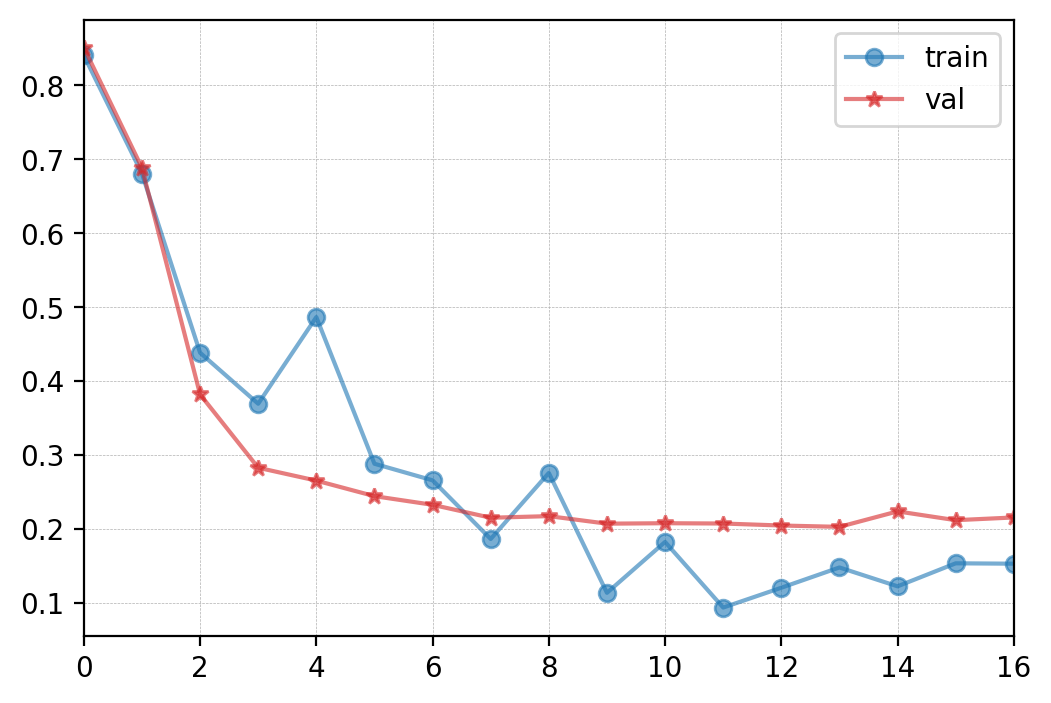

In [37]:
plt.figure(figsize=(6, 4), facecolor='white')
plt.plot(train_log_df['train loss'], color='tab:blue', marker='o', alpha=0.6, label='train')
plt.plot(train_log_df['val loss'], color='tab:red', marker='*', alpha=0.6, label='val')
plt.grid(lw=0.25, ls='--')
plt.legend()
plt.autoscale(enable=True, axis='x', tight=True);